In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
from scipy.signal import savgol_filter
from scipy.misc import derivative

filename = "IMG-20230421-WA0002.jpg"

im = cv2.imread(filename)

im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

im_gray = np.array(Image.open(filename).convert('L'))

In [2]:
im_gray = np.rot90(im_gray)

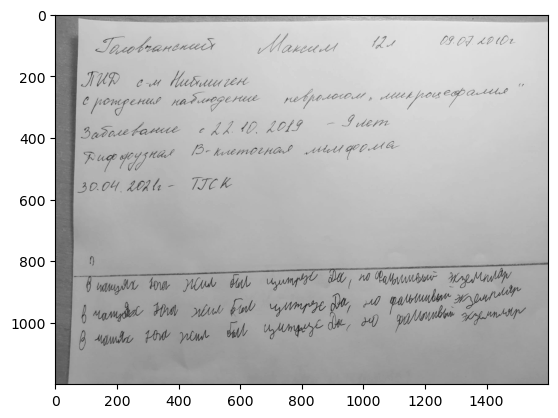

In [3]:
plt.imshow(im_gray)
plt.gray()
plt.show()

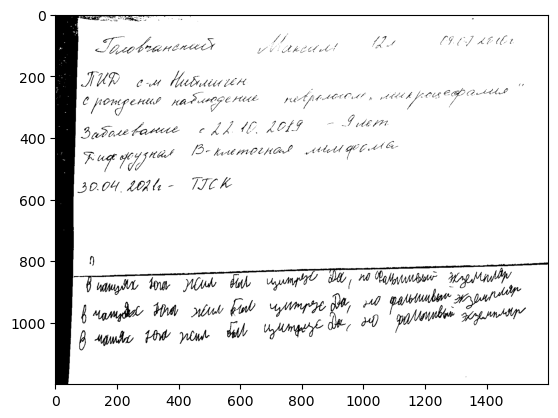

In [4]:
maxval = 255
thresh = 128

im_bin = (im_gray > thresh) * maxval
plt.imshow(im_bin)
plt.gray()
plt.show()

In [5]:
def dfs(matrix, visited, i, j, points):
    # Mark the current cell as visited
    visited[i][j] = 1
    points.append((i, j))
    # Check the neighboring cells
    for x in range(i-1, i+2):
        for y in range(j-1, j+2):
            if 0 <= x < len(matrix) and 0 <= y < len(matrix[0]):
                if matrix[x][y] == 0 and visited[x][y] == 0:
                    dfs(matrix, visited, x, y, points)

def get_outers(matrix):
    visited = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i][j] == 0:
                if i == 0 or j == 0 or i == matrix.shape[0] - 1 or j == matrix.shape[1] - 1:
                    visited[i][j] = 0
                else:
                    visited[i][j] = 255
                continue
            if i + 1 < matrix.shape[0] and matrix[i+1][j] == 0:
                visited[i][j] = 0
            elif j + 1 < matrix.shape[1] and matrix[i][j+1] == 0:
                visited[i][j] = 0
            elif j - 1 >= 0 and matrix[i][j-1] == 0:
                visited[i][j] = 0
            elif i - 1 >= 0 and matrix[i-1][j] == 0:
                visited[i][j] = 0
            else:
                visited[i][j] = 255
    return visited
        
                    
def get_lines(matrix):
    points_arr = []
    matrix2 = get_outers(matrix)
    visited = np.zeros_like(matrix2)
    for i in range(matrix2.shape[0]):
        for j in range(matrix2.shape[1]):
            if visited[i, j] == 0 and matrix2[i, j] == 0:
                points = []
                dfs(matrix2, visited, i, j, points)
                points_arr.append(points)
    return points_arr

def curvature(x, y):
    """Calculate the curvature of a 2D curve"""
    dx_dt = savgol_filter(x, window_length=15, polyorder=2, deriv=1)
    dy_dt = savgol_filter(y, window_length=15, polyorder=2, deriv=1)
    d2x_dt2 = savgol_filter(x, window_length=15, polyorder=2, deriv=2)
    d2y_dt2 = savgol_filter(y, window_length=15, polyorder=2, deriv=2)
    numerator = dx_dt * d2y_dt2 - d2x_dt2 * dy_dt
    denominator = (dx_dt ** 2 + dy_dt ** 2) ** (3/2)
    return numerator / denominator

def get_curvature(matrix):
    points_arr = get_lines(matrix)
    for i in range(len(points_arr)):
        points_arr[i] = points_arr[i][:-8]
    curvatures = np.array([])
    for points in points_arr:
        if len(points) == 0:
            continue
        x, y = zip(*points)
        if len(x) <= 15:
            continue
        x = np.array(x)
        y = np.array(y)
        x = x - np.min(x)
        y = y - np.min(y)
        max_x = np.max(x)
        max_y = np.max(y)
        curv = curvature(x/max(max_x, max_y), y/max(max_x, max_y))
        curvatures = np.concatenate((curvatures, curv))
    return curvatures
        

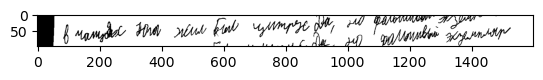

In [6]:
plt.imshow(im_bin[910:1010, :])

In [7]:
letters_curvature = dict()

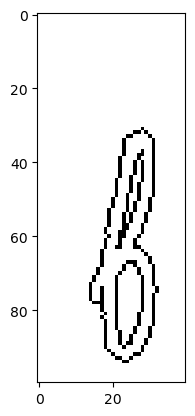

In [8]:
v = im_bin[910:1010, 70:110]
plt.imshow(get_outers(v))
plt.gray()
plt.show()

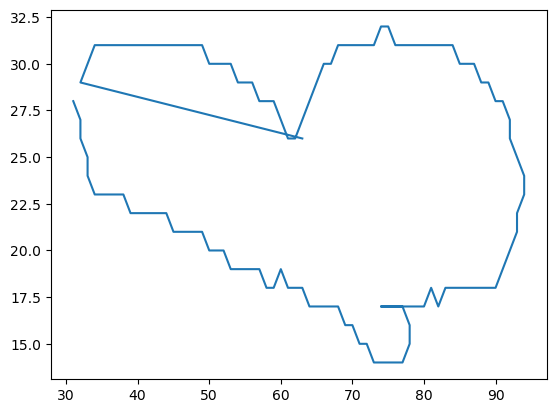

In [9]:
x, y = zip(*get_lines(v)[0])
plt.plot(x, y)

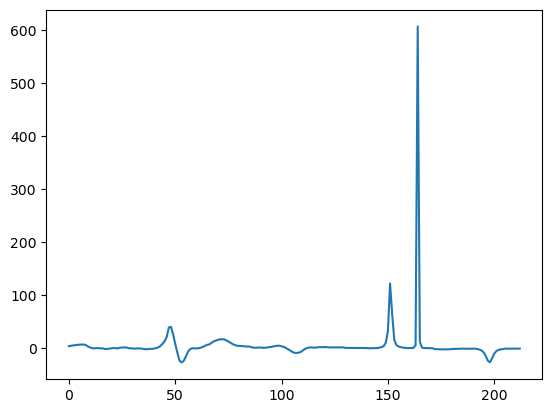

In [10]:
letters_curvature['v'] = get_curvature(v)
plt.plot(get_curvature(v))

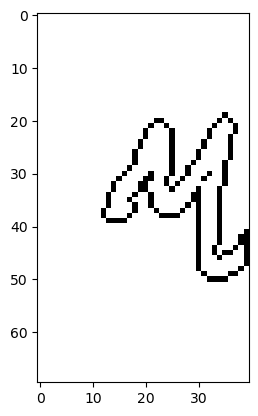

In [11]:
ch = im_bin[940:1010, 110:150]
plt.imshow(get_outers(ch))
plt.gray()
plt.show()

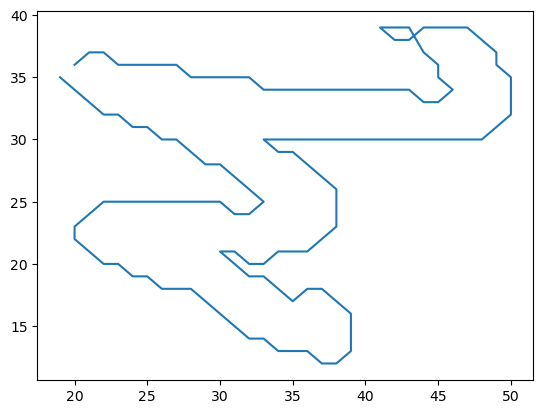

In [12]:
x, y = zip(*get_lines(ch)[0])
plt.plot(x, y)

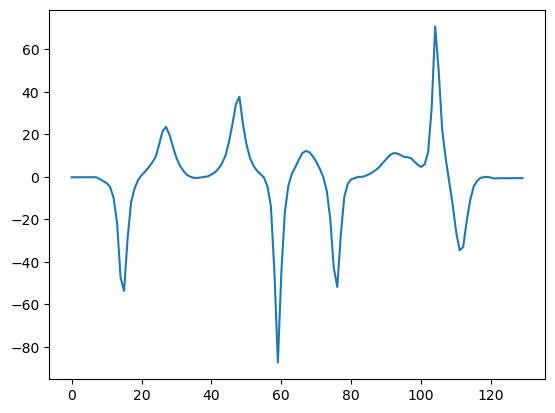

In [13]:
letters_curvature['ch'] = get_curvature(ch)
plt.plot(get_curvature(ch))

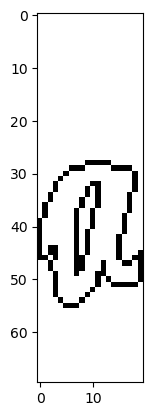

In [14]:
a = im_bin[940:1010, 150:170]
plt.imshow(get_outers(a))
plt.gray()
plt.show()

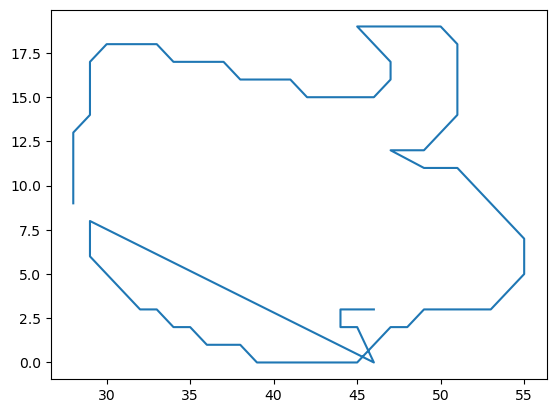

In [15]:
x, y = zip(*get_lines(a)[0])
plt.plot(x, y)

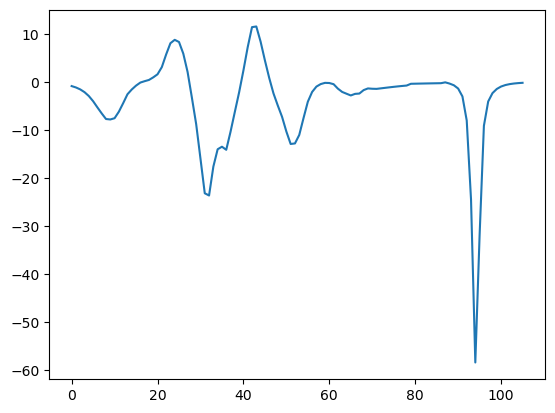

In [16]:
letters_curvature['a'] = get_curvature(a)
plt.plot(get_curvature(a))

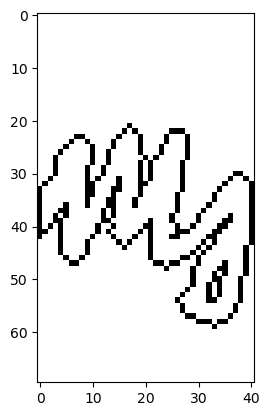

In [17]:
sha = im_bin[940:1010, 175:216]
plt.imshow(get_outers(sha))
plt.gray()
plt.show()

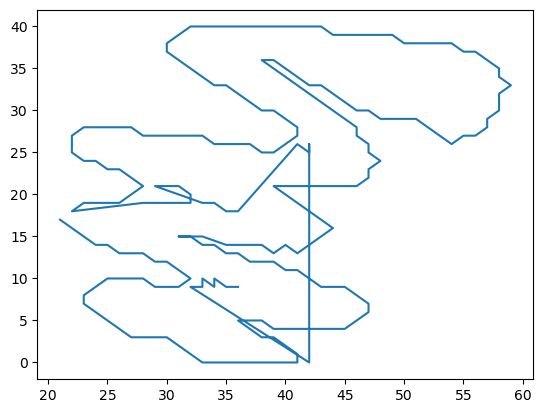

In [18]:
x, y = zip(*get_lines(sha)[0])
plt.plot(x, y)

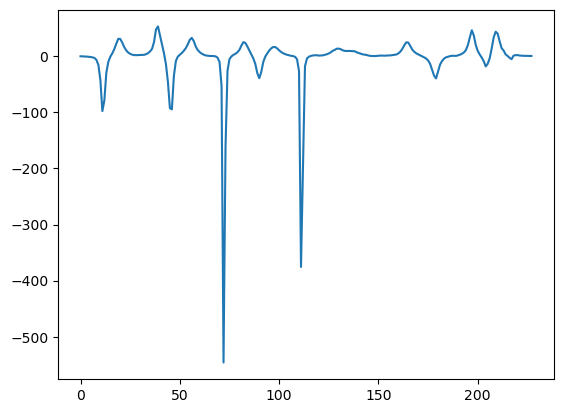

In [19]:
letters_curvature['sha'] = get_curvature(sha)
plt.plot(get_curvature(sha))

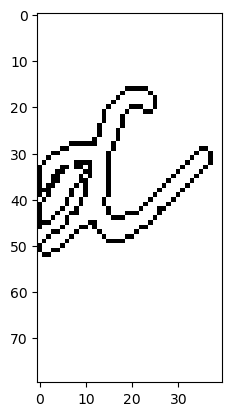

In [20]:
h = im_bin[930:1010, 250:290]
plt.imshow(get_outers(h))
plt.gray()
plt.show()

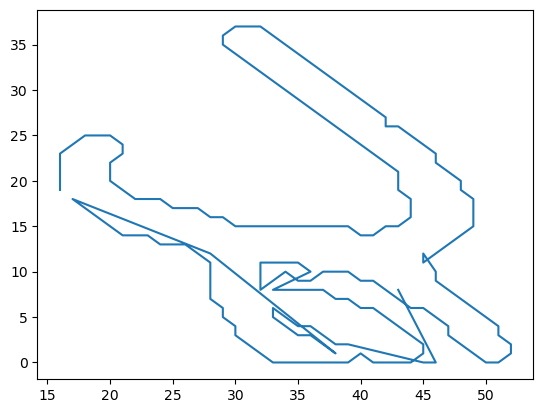

In [21]:
x, y = zip(*get_lines(h)[0])
plt.plot(x, y)

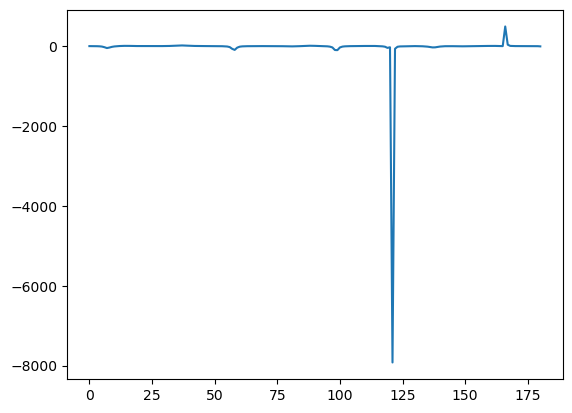

In [22]:
letters_curvature['h'] = get_curvature(h)
plt.plot(get_curvature(h))

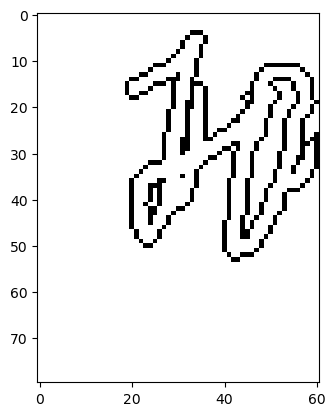

In [23]:
u = im_bin[930:1010, 300:361]
plt.imshow(get_outers(u))
plt.gray()
plt.show()

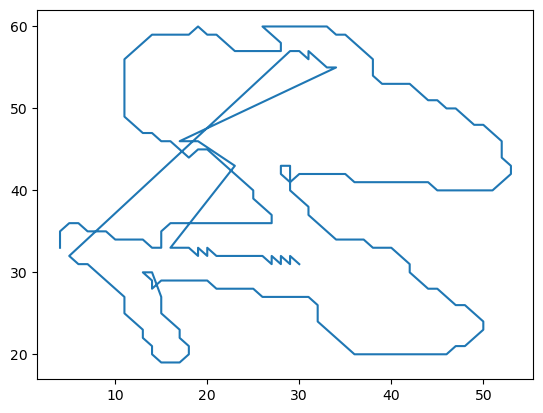

In [24]:
x, y = zip(*get_lines(u)[0])
plt.plot(x, y)

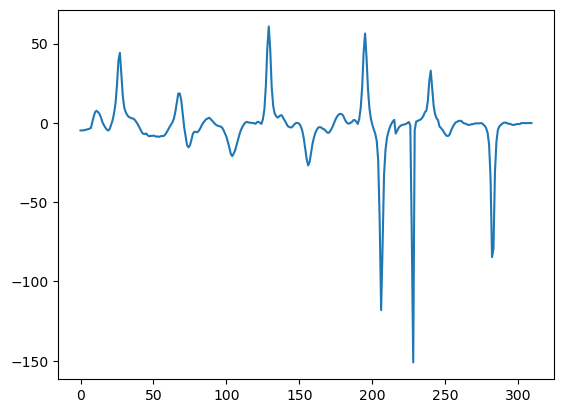

In [25]:
letters_curvature['u'] = get_curvature(u)
plt.plot(get_curvature(u))

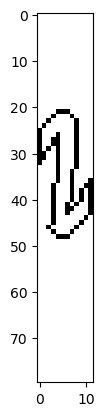

In [26]:
g = im_bin[930:1010, 360:372]
plt.imshow(get_outers(g))
plt.gray()
plt.show()

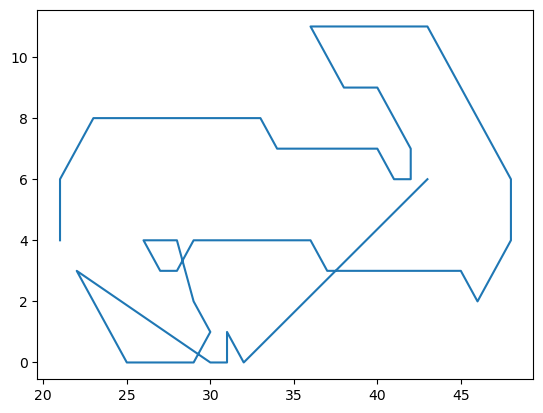

In [27]:
x, y = zip(*get_lines(g)[0])
plt.plot(x, y)

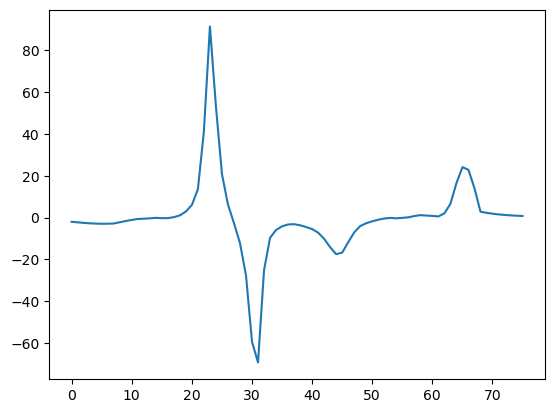

In [28]:
letters_curvature['g'] = get_curvature(g)
plt.plot(get_curvature(g))

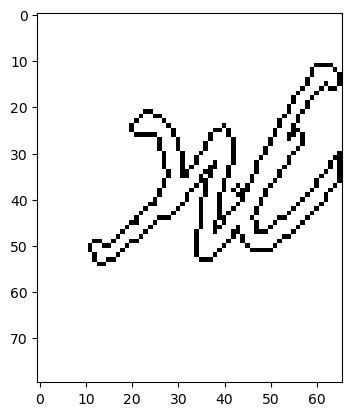

In [29]:
zh = im_bin[930:1010, 430:496]
plt.imshow(get_outers(zh))
plt.gray()
plt.show()

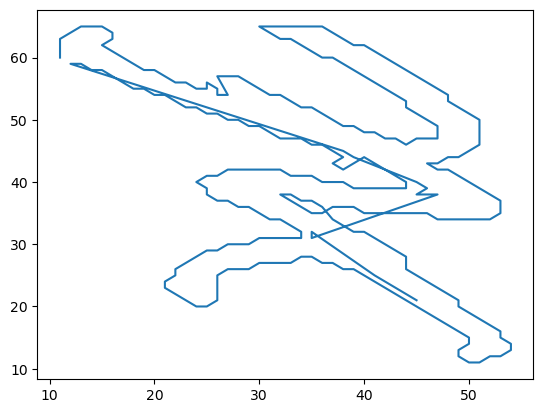

In [30]:
x, y = zip(*get_lines(zh)[0])
plt.plot(x, y)

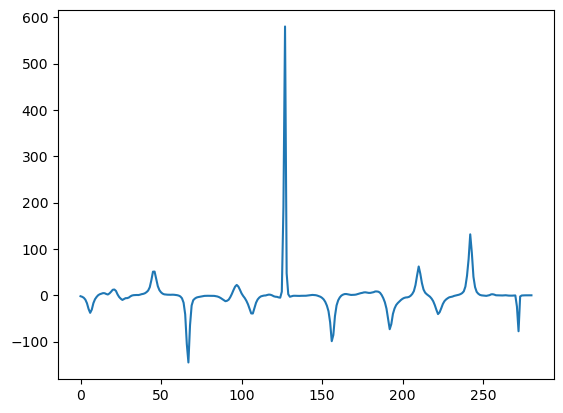

In [31]:
letters_curvature['zh'] = get_curvature(zh)
plt.plot(get_curvature(zh))

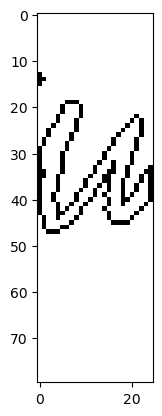

In [32]:
i = im_bin[930:1010, 495:520]
plt.imshow(get_outers(i))
plt.gray()
plt.show()

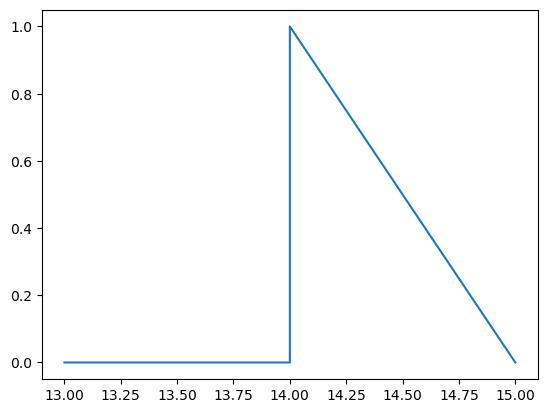

In [33]:
x, y = zip(*get_lines(i)[0])
plt.plot(x, y)

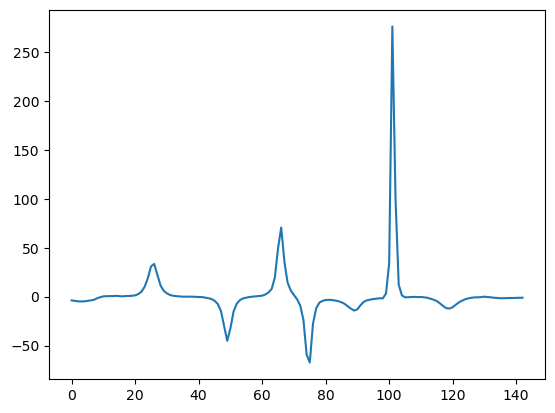

In [34]:
letters_curvature['i'] = get_curvature(i)
plt.plot(get_curvature(i))

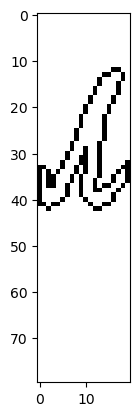

In [35]:
l = im_bin[930:1010, 520:540]
plt.imshow(get_outers(l))
plt.gray()
plt.show()

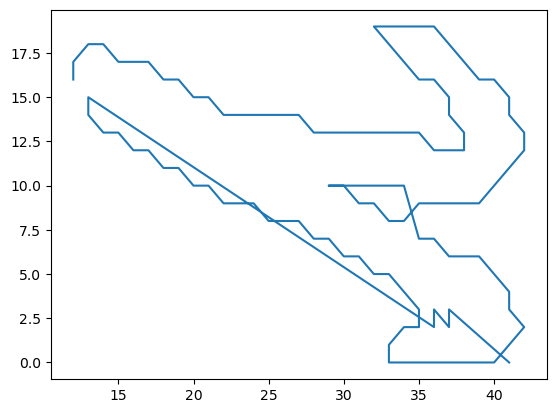

In [36]:
x, y = zip(*get_lines(l)[0])
plt.plot(x, y)

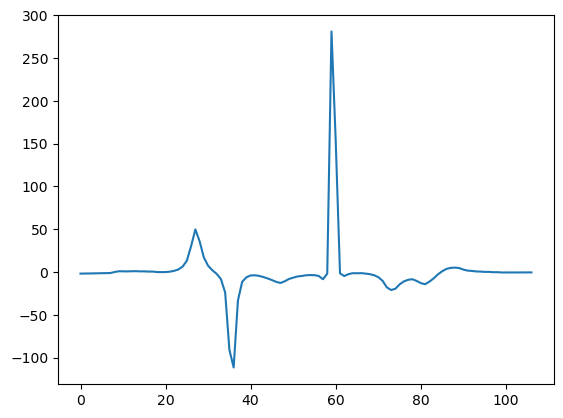

In [37]:
letters_curvature['l'] = get_curvature(l)
plt.plot(get_curvature(l))

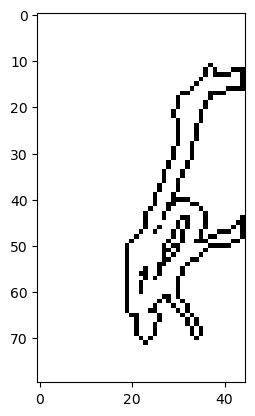

In [38]:
b = im_bin[910:990, 550:595]
plt.imshow(get_outers(b))
plt.gray()
plt.show()

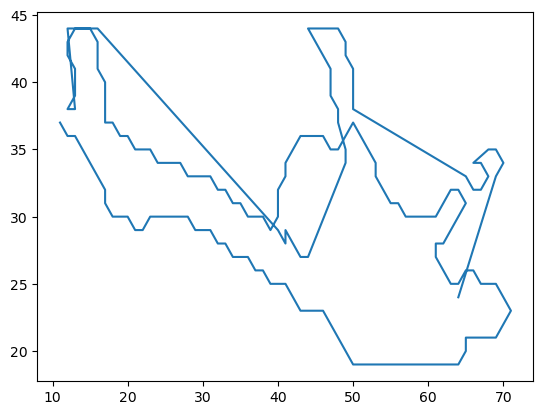

In [39]:
x, y = zip(*get_lines(b)[0])
plt.plot(x, y)

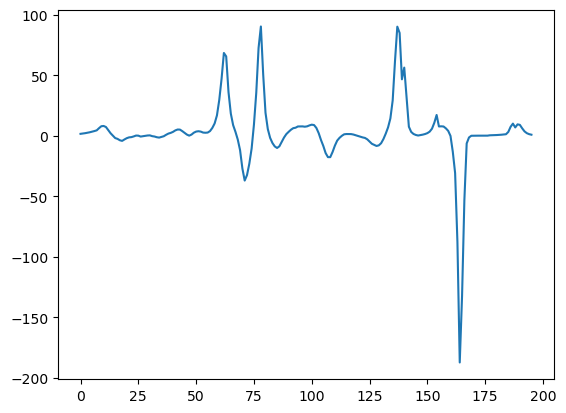

In [40]:
letters_curvature['b'] = get_curvature(b)
plt.plot(get_curvature(b))

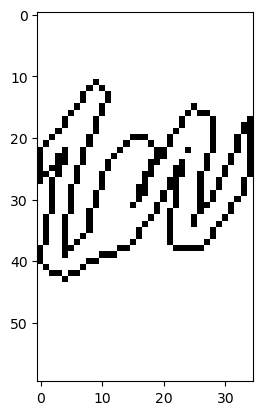

In [41]:
bl = im_bin[930:990, 595:630]
plt.imshow(get_outers(bl))
plt.gray()
plt.show()

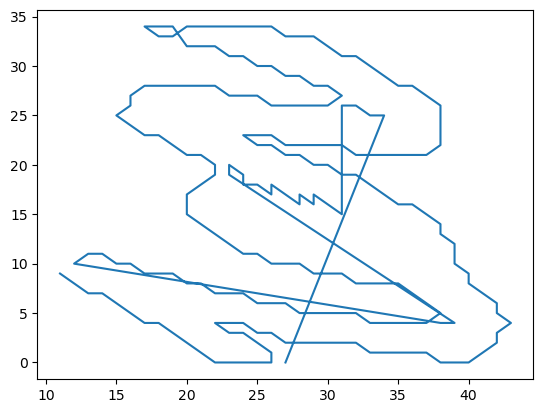

In [42]:
x, y = zip(*get_lines(bl)[0])
plt.plot(x, y)

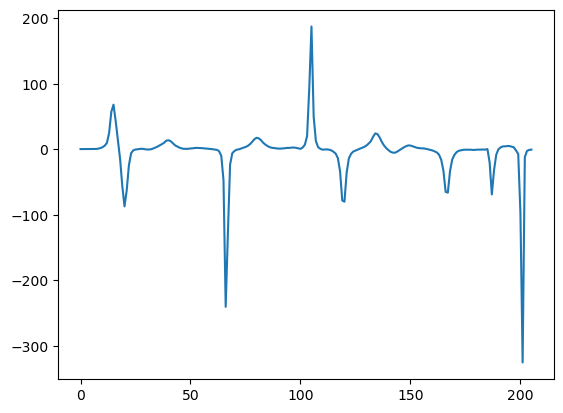

In [43]:
letters_curvature['bl'] = get_curvature(bl)
plt.plot(get_curvature(bl))

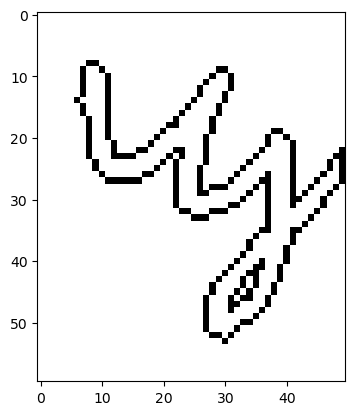

In [44]:
c = im_bin[930:990, 690:740]
plt.imshow(get_outers(c))
plt.gray()
plt.show()

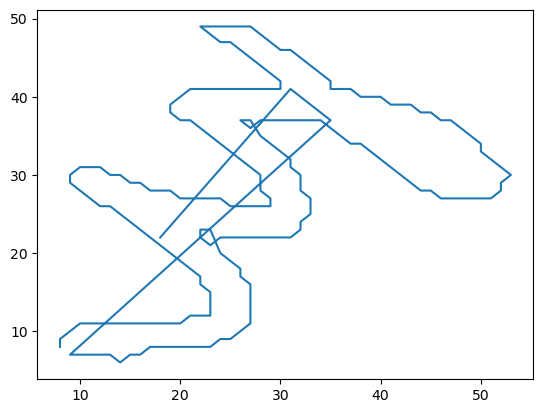

In [45]:
x, y = zip(*get_lines(c)[0])
plt.plot(x, y)

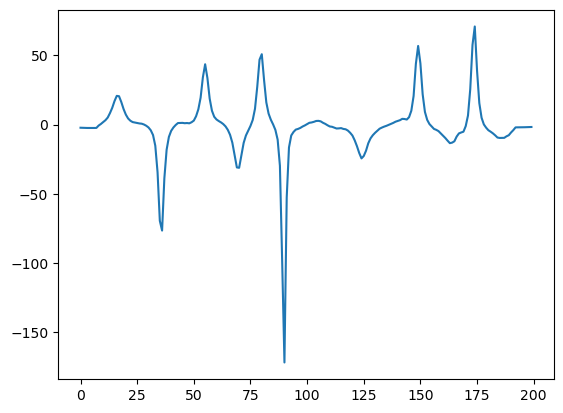

In [46]:
letters_curvature['c'] = get_curvature(c)
plt.plot(get_curvature(c))

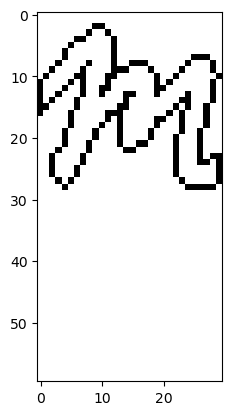

In [47]:
t = im_bin[930:990, 773:803]
plt.imshow(get_outers(t))
plt.gray()
plt.show()

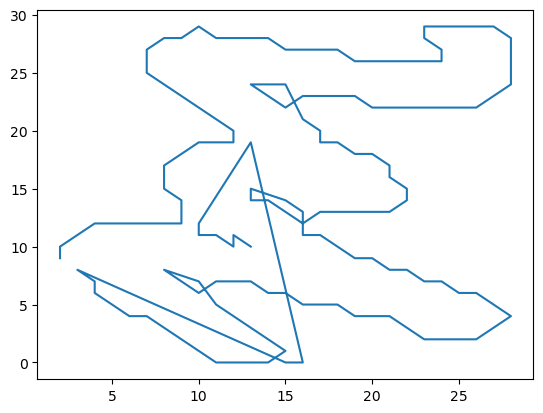

In [48]:
x, y = zip(*get_lines(t)[0])
plt.plot(x, y)

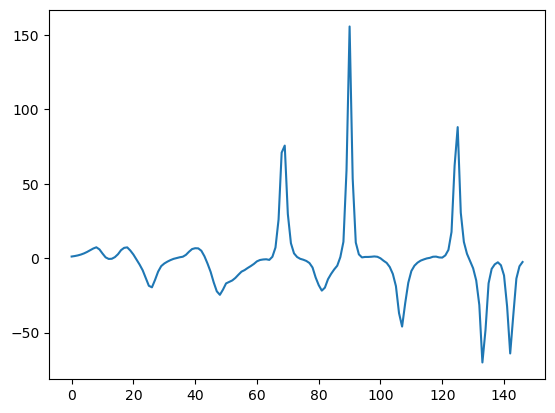

In [49]:
letters_curvature['t'] = get_curvature(t)
plt.plot(get_curvature(t))

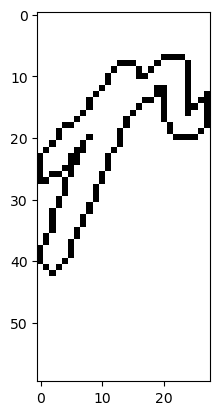

In [50]:
r = im_bin[930:990, 802:830]
plt.imshow(get_outers(r))
plt.gray()
plt.show()

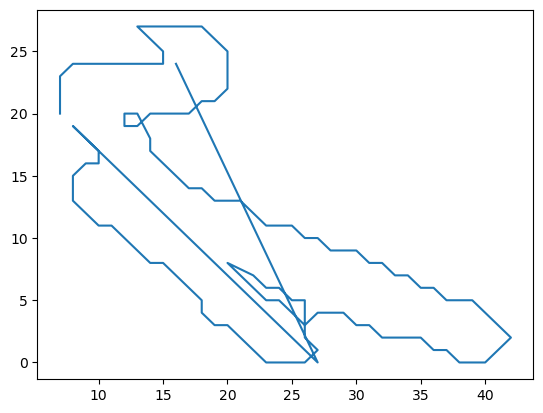

In [51]:
x, y = zip(*get_lines(r)[0])
plt.plot(x, y)

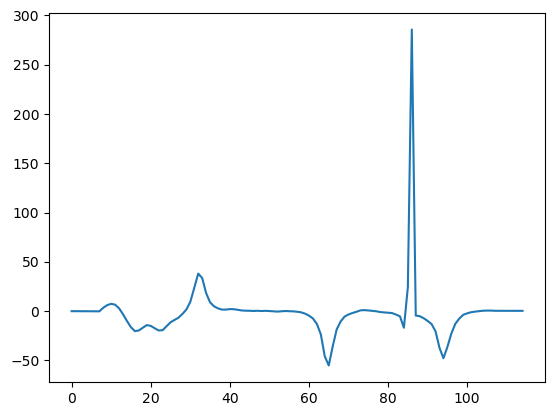

In [52]:
letters_curvature['r'] = get_curvature(r)
plt.plot(get_curvature(r))

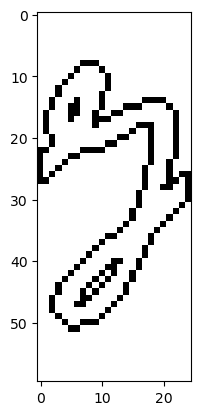

In [53]:
y = im_bin[920:980, 830:855]
plt.imshow(get_outers(y))
plt.gray()
plt.show()

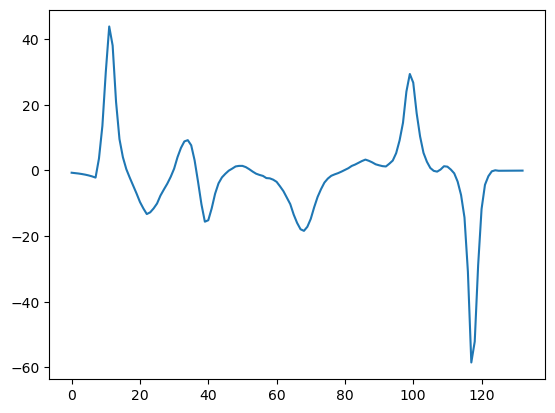

In [54]:
letters_curvature['y'] = get_curvature(y)
plt.plot(get_curvature(y))

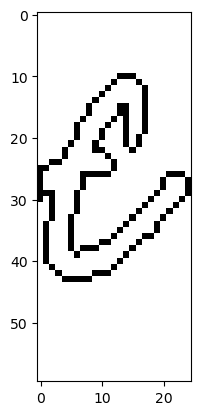

In [55]:
s = im_bin[920:980, 855:880]
plt.imshow(get_outers(s))
plt.gray()
plt.show()

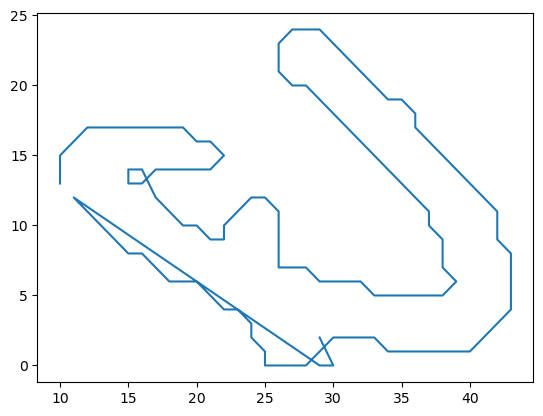

In [56]:
x, y = zip(*get_lines(s)[0])
plt.plot(x, y)

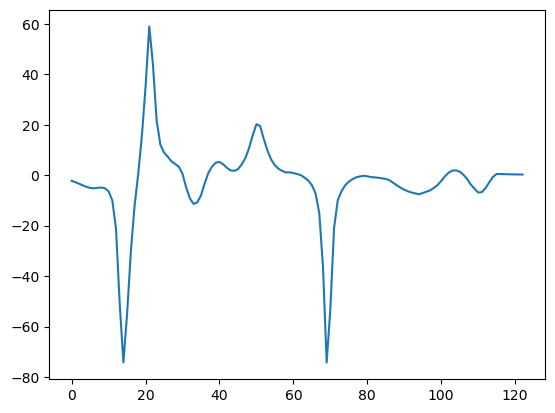

In [57]:
letters_curvature['s'] = get_curvature(s)
plt.plot(get_curvature(s))

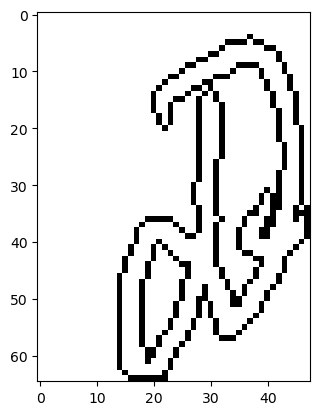

In [58]:
d = im_bin[900:965, 880:928]
plt.imshow(get_outers(d))
plt.gray()
plt.show()

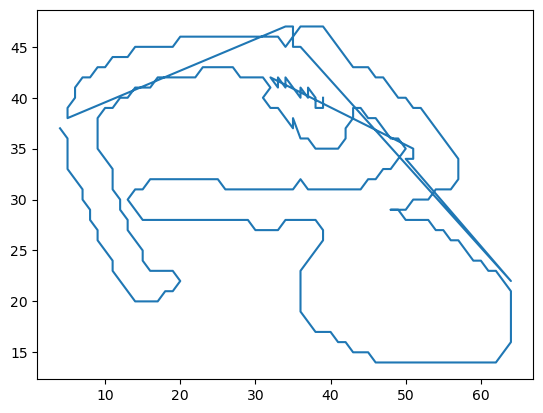

In [59]:
x, y = zip(*get_lines(d)[0])
plt.plot(x, y)

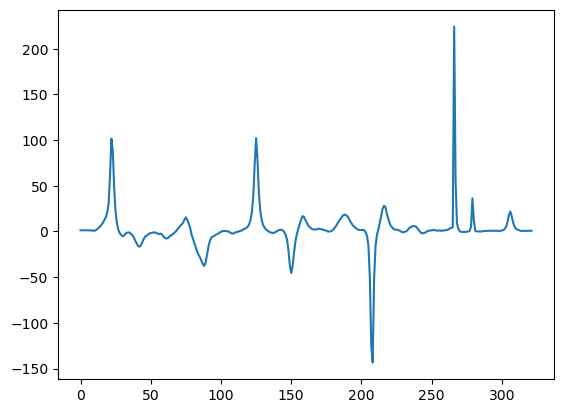

In [60]:
letters_curvature['d'] = get_curvature(d)
plt.plot(get_curvature(d))

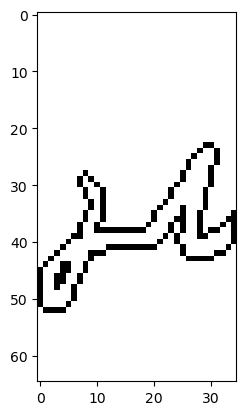

In [61]:
n = im_bin[900:965, 1000:1035]
plt.imshow(get_outers(n))
plt.gray()
plt.show()

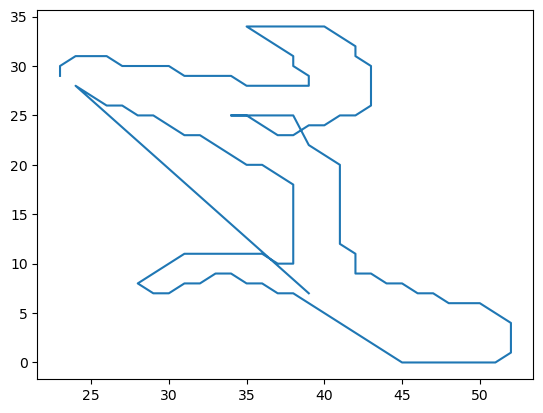

In [62]:
x, y = zip(*get_lines(n)[0])
plt.plot(x, y)

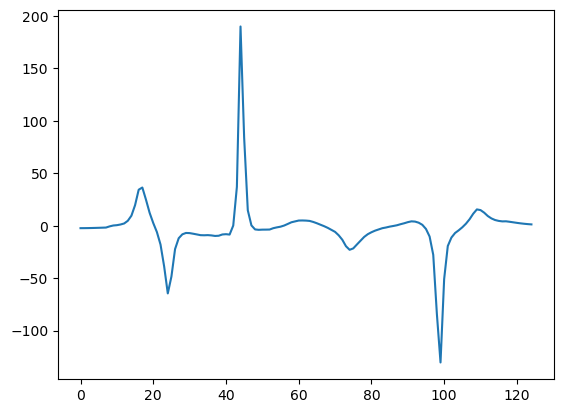

In [63]:
letters_curvature['n'] = get_curvature(n)
plt.plot(get_curvature(n))

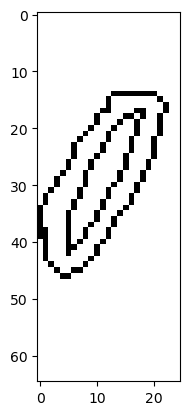

In [64]:
o = im_bin[900:965, 1035:1060]
plt.imshow(get_outers(o))
plt.gray()
plt.show()

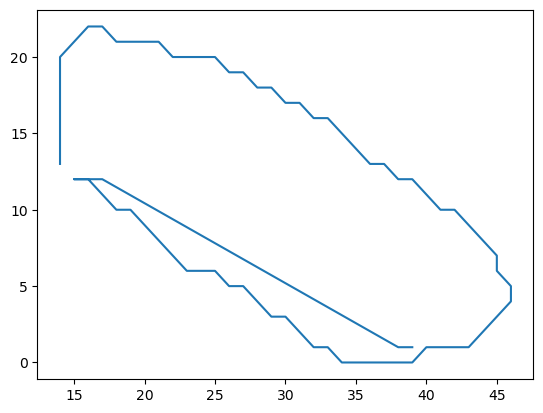

In [65]:
x, y = zip(*get_lines(o)[0])
plt.plot(x, y)

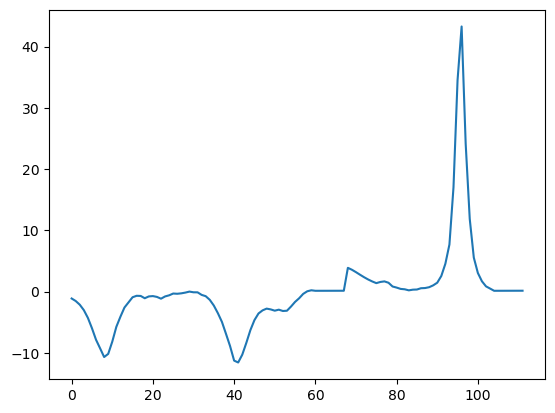

In [66]:
letters_curvature['o'] = get_curvature(o)
plt.plot(get_curvature(o))

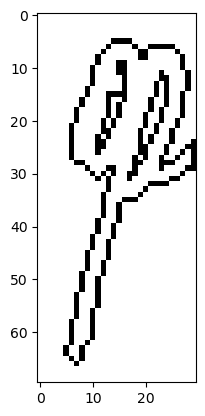

In [67]:
ph = im_bin[910:980, 1080:1110]
plt.imshow(get_outers(ph))
plt.gray()
plt.show()

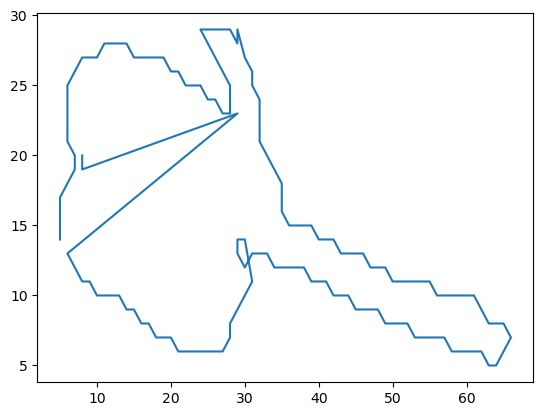

In [68]:
x, y = zip(*get_lines(ph)[0])
plt.plot(x, y)

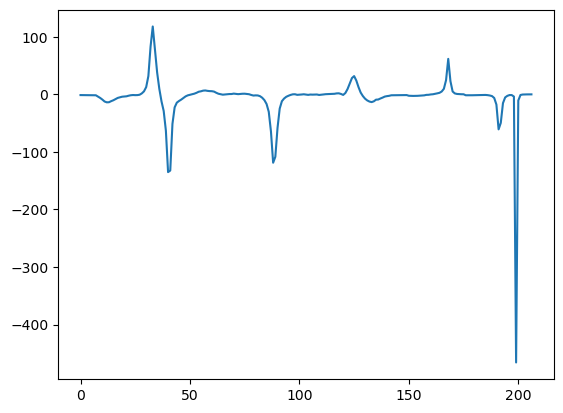

In [69]:
letters_curvature['ph'] = get_curvature(ph)
plt.plot(get_curvature(ph))

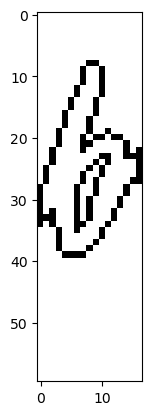

In [70]:
myagk = im_bin[900:960, 1146:1163]
plt.imshow(get_outers(myagk))
plt.gray()
plt.show()

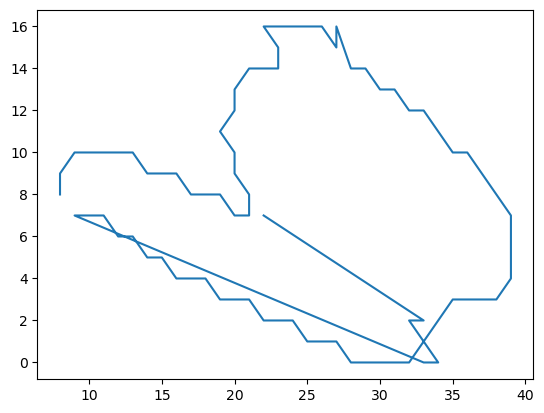

In [71]:
x, y = zip(*get_lines(myagk)[0])
plt.plot(x, y)

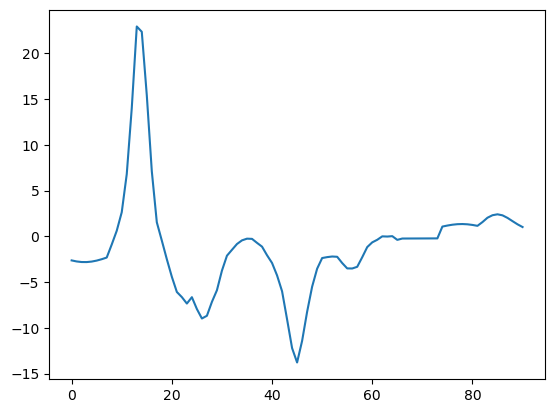

In [72]:
letters_curvature['myagk'] = get_curvature(myagk)
plt.plot(get_curvature(myagk))

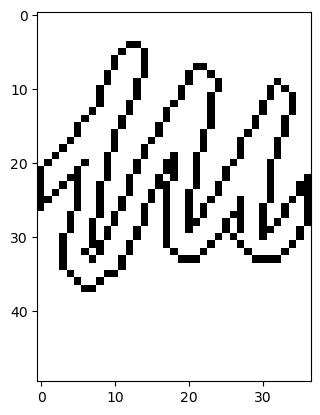

In [73]:
sh = im_bin[900:950, 1163:1200]
plt.imshow(get_outers(sh))
plt.gray()
plt.show()

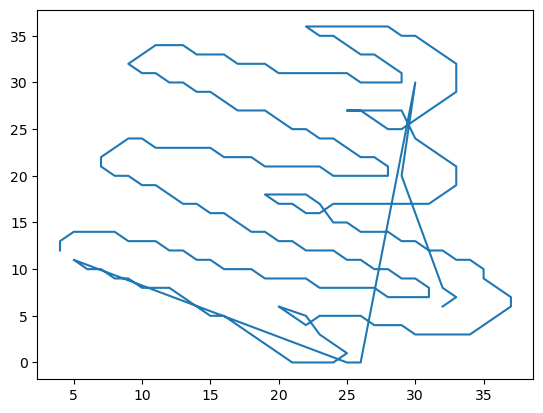

In [74]:
x, y = zip(*get_lines(sh)[0])
plt.plot(x, y)

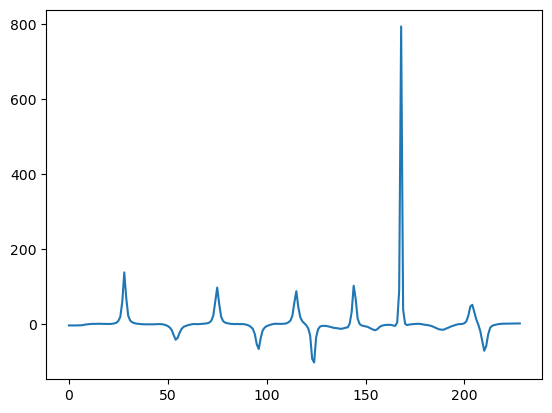

In [75]:
letters_curvature['sh'] = get_curvature(sh)
plt.plot(get_curvature(sh))

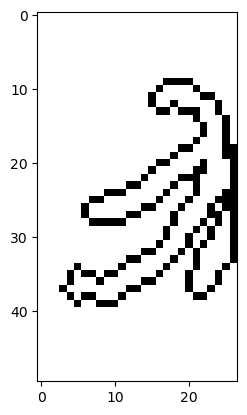

In [76]:
e = im_bin[900:950, 1290:1317]
plt.imshow(get_outers(e))
plt.gray()
plt.show()

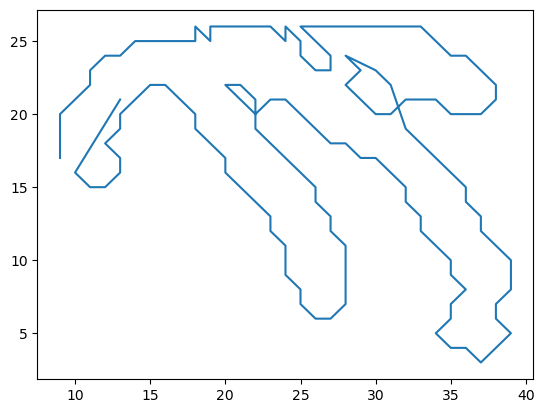

In [77]:
x, y = zip(*get_lines(e)[0])
plt.plot(x, y)

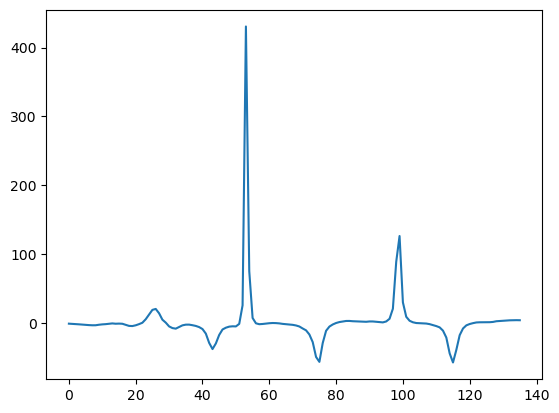

In [78]:
letters_curvature['e'] = get_curvature(e)
plt.plot(get_curvature(e))

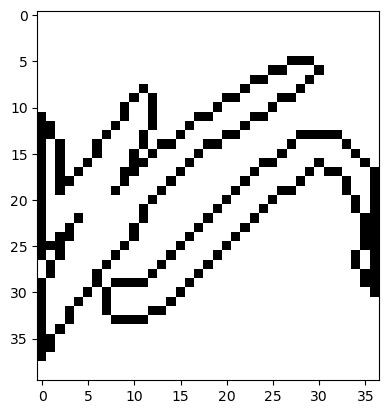

In [79]:
k = im_bin[900:940, 1313:1350]
plt.imshow(get_outers(k))
plt.gray()
plt.show()

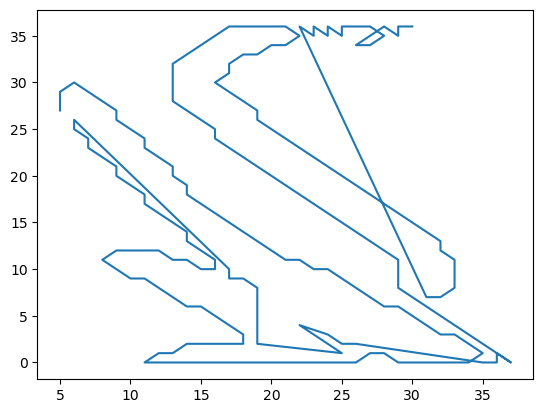

In [80]:
x, y = zip(*get_lines(k)[0])
plt.plot(x, y)

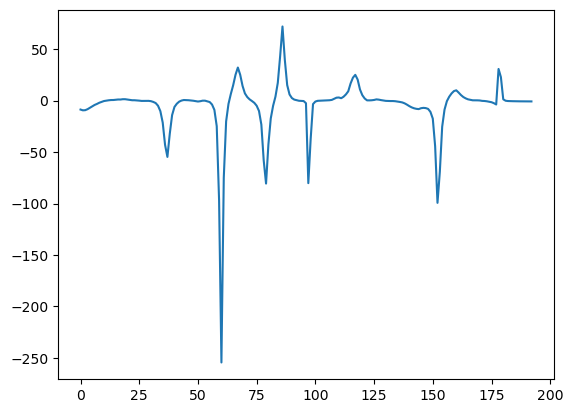

In [81]:
letters_curvature['k'] = get_curvature(k)
plt.plot(get_curvature(k))

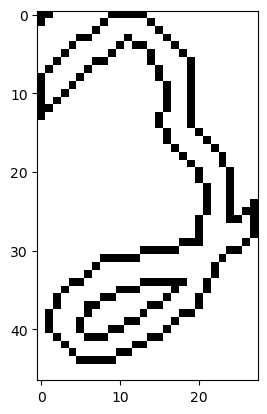

In [82]:
z = im_bin[913:960, 1332:1360]
plt.imshow(get_outers(z))
plt.gray()
plt.show()

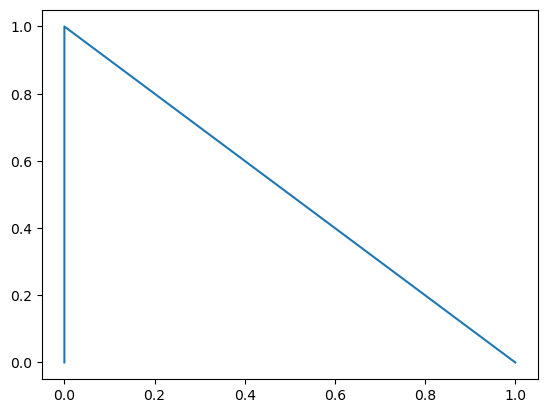

In [83]:
x, y = zip(*get_lines(z)[0])
plt.plot(x, y)

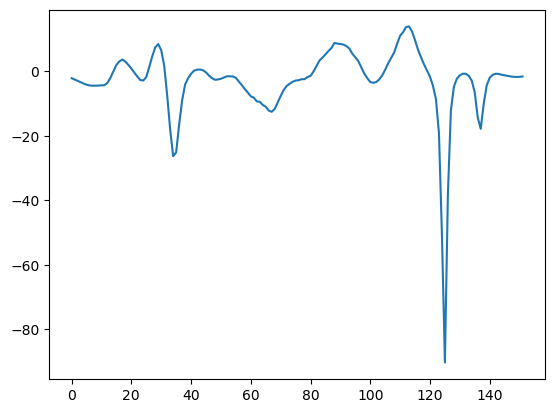

In [84]:
letters_curvature['z'] = get_curvature(z)
plt.plot(get_curvature(z))

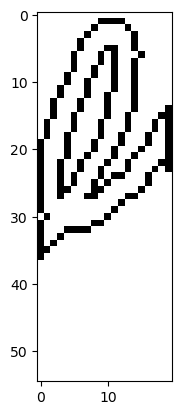

In [85]:
ye = im_bin[905:960, 1360:1380]
plt.imshow(get_outers(ye))
plt.gray()
plt.show()

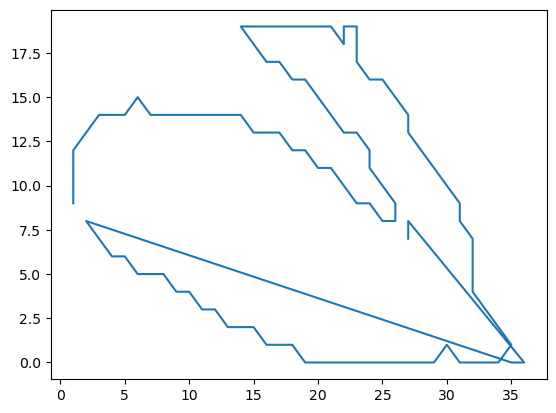

In [86]:
x, y = zip(*get_lines(ye)[0])
plt.plot(x, y)

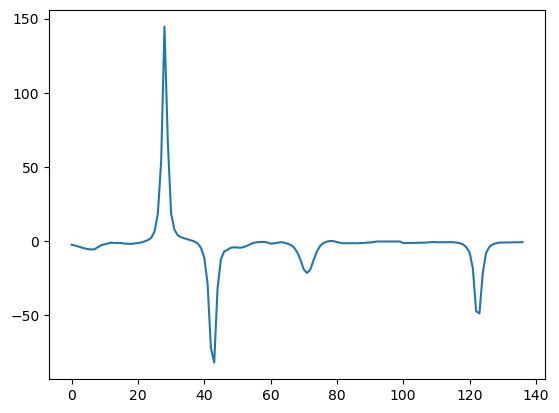

In [87]:
letters_curvature['ye'] = get_curvature(ye)
plt.plot(get_curvature(ye))

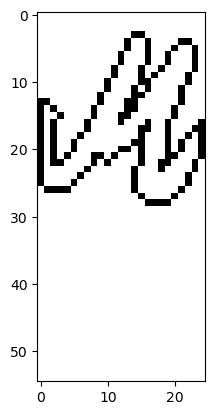

In [88]:
m = im_bin[905:960, 1380:1405]
plt.imshow(get_outers(m))
plt.gray()
plt.show()

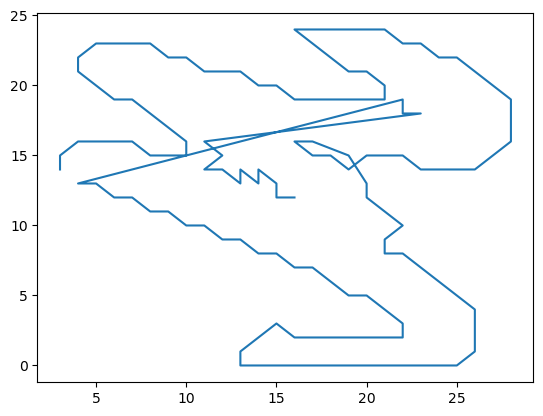

In [89]:
x, y = zip(*get_lines(m)[0])
plt.plot(x, y)

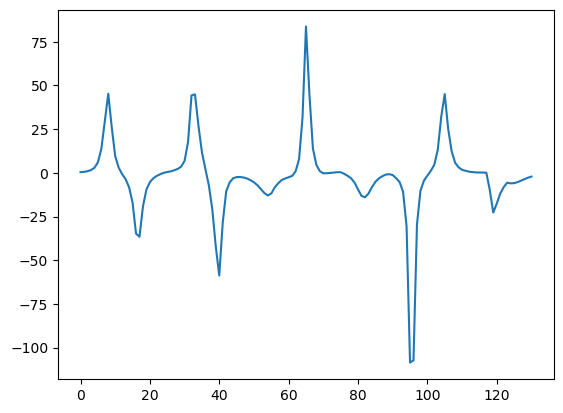

In [90]:
letters_curvature['m'] = get_curvature(m)
plt.plot(get_curvature(m))

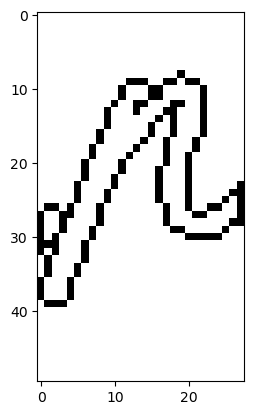

In [91]:
p = im_bin[890:940, 1407:1435]
plt.imshow(get_outers(p))
plt.gray()
plt.show()

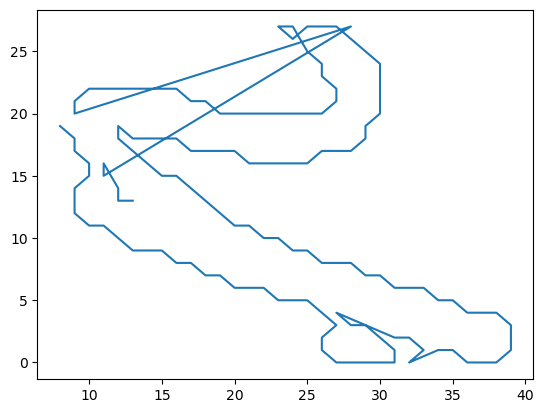

In [92]:
x, y = zip(*get_lines(p)[0])
plt.plot(x, y)

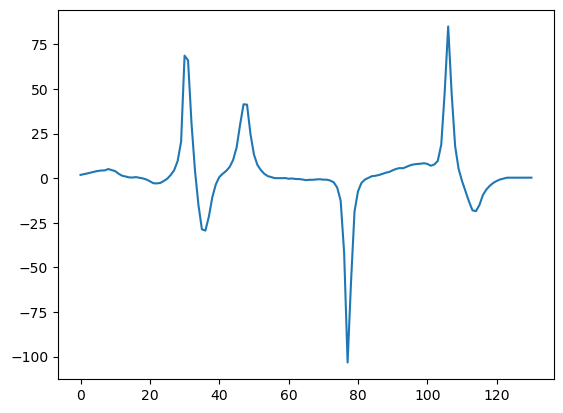

In [93]:
letters_curvature['p'] = get_curvature(p)
plt.plot(get_curvature(p))

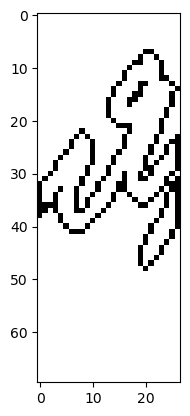

In [94]:
ya = im_bin[870:940, 1460:1487]
plt.imshow(get_outers(ya))
plt.gray()
plt.show()

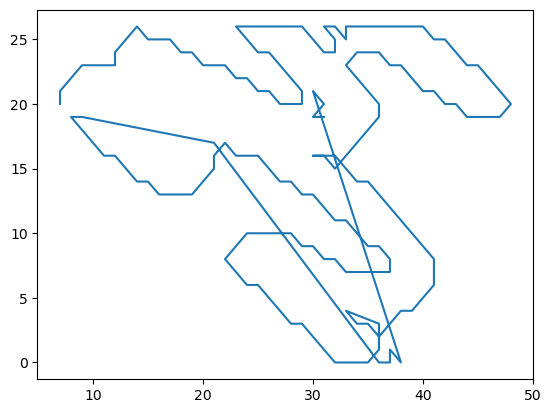

In [95]:
x, y = zip(*get_lines(ya)[0])
plt.plot(x, y)

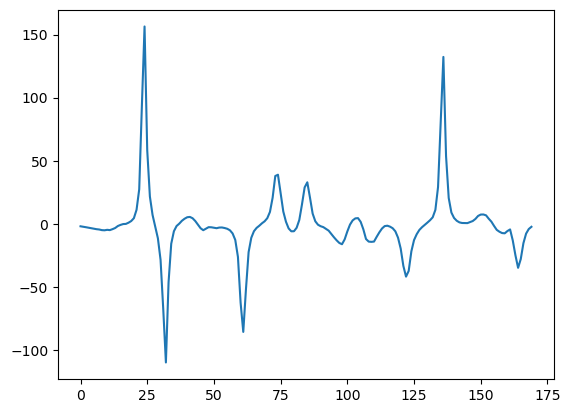

In [96]:
letters_curvature['ya'] = get_curvature(ya)
plt.plot(get_curvature(ya))

In [97]:
import pickle
output = open('data4.pkl', 'wb')

pickle.dump(letters_curvature, output)